# Week 8 Day 1: Generating distributions

## Objectives:
* Talk a bit about projects
* Review older homework sets
* Talk a bit about testing
* Look at generating distributions

## Testing

There are two types of tests:
* **Integration tests** - these check your project as a whole
* **Unit tests** - these test teach component of your project

Unit tests can also have a useful metric:
* **Coverage**: how much of your code is run by the unit tests

<font color="red">
Warning: 100% coverage is great, but does not mean you cannot have bugs!

#### Simple testing:

In [ ]:
def square(x):
    return x**2

In [ ]:
assert square(2) == 4
assert square(0) == 0
assert square(-2) == 4
# Test for square("hi") == fail

Good tests mean:

* At least one per function or functionality of your code
* Should cover "normal" and "edge case" inputs
* It's okay to throw an error if something is wrong! You can test for that. Silently failing is bad.

Testing may even give users an example of how to run the code!

![Coder image](AboutCoders-a5-20101003-2113.jpg)

Missing features from simple testing:

* Nice reporting of what went wrong
* Finishing the tests even with 1+ failures
* Ways to mark tests as OK to fail
* Easy to combine many test files

### Testing frameworks: Unittest

Unittest is built into Python, and is actually pretty powerful (after Python 2.6, anyway). However, it fails at the #1 most important feature of tests: They should be easy to write. Most people will treat tests as something "optional", and will not bother to write them unless writing them is fun. Look at the test above, written in Unittest:

In [ ]:
import unittest

class MyTestClass(unittest.TestCase):
    def test_square(self):
        
        self.assertEqual(square(2), 4)
        self.assertEqual(square(0), 0)
        self.assertEqual(square(-2), 4)

        self.assertRaises(TypeError, square, "hi")

In a file, this is pretty trivial to run, with the auto-test discovery feature. We'll have to use the trick from [here](https://medium.com/@vladbezden/using-python-unittest-in-ipython-or-jupyter-732448724e31) to run in the jupyter notebook, however:

In [ ]:
unittest.main(argv=['first-arg-is-ignored'], exit=False);

<font color="green">
Pros:

* Pure python - can even run from notebook
* Included in Python
* Somewhat standard "JUnit" style

<font color="red">
Cons:

* Ugly and verbose
* Have to remember/look up all the comparisons
* Have to write JUnit (from Java) style test classes
* Even though you are using classes, you *also* have to use names that include the word "test"

## Testing frameworks: Doctest
Also built into Python, this looks through your documentation and runs any code it finds! Sounds good, but only useful for very small projects, I've found.

## Testing frameworks: Nose
Was the first real improvement over Unittest, but was not radically different. Some features made it into Unittest in Python 2.7, and now has mostly been supplanted by PyTest. You might occasionally see Nose out in the wild, but don't use it on your projects.

## PyTest

This is the "Pythonic" answer to testing. It:

* Runs Unittest, Nose, and PyTest style tests
* Provides a dead-simple interface without classes or special methods
* Supports a huge amount of customization, usually in a simple, Pythonic way

The downside: it doesn't run inside a Jupyter notebook, since it is actually rewriting python's assert statements!

In [ ]:
%%writefile pytestexample.py

import pytest # only needed for pytest.raises

def square(x):
    return x**2

def test_square():
    assert square(2) == 4
    assert square(0) == 0
    assert square(-2) == 4
    
    with pytest.raises(TypeError):
        square("hi")

In [ ]:
!python -m pytest pytestexample.py

PyTest has lots of other features:

* Classes: You can use vanilla classes to group tests
* Fixtures: You can get things on a per-test basis, like temporary files, etc.
* Markers: You can mark a test as failing, skipped on certain conditions, etc.
* Setup/Teardown: Can be done per file, per class, or per test
* Configuration: You can set up a configuration file to customize all tests, make your own fixtures, etc.

## Test driven development

Write your tests first, then write the code!

* Helps you design the interface before you write the longest part of the code
* Is more likely to catch bugs then writing tests when you know the code result
* Ensures you do not skip writing the tests
* Gives you a target

See the great example in [Dive into Python](http://histo.ucsf.edu/BMS270/diveintopython3-r802.pdf) in the Unit Test chapter.

I've found in the sciences, test driven development is surprisingly rare. I even do it less than I could.

# Distributions

Let's look at generating distributions now.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

## Case 1: Existing distribution

Let's say you are generating a distribution that is quite common: You should be able to find it in SciPy (or even Numpy):

* <https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html>
* <https://docs.scipy.org/doc/scipy/reference/stats.html>

Let's focus on the lognormal distribution:

$$
p(x) = \frac{1}{\sigma x \sqrt{2\pi}}
e^{-\frac{\left(\ln(x)-\mu\right)^2}{2\sigma^2}}
$$

That's directly available in Numpy using `np.random.lognormal`:

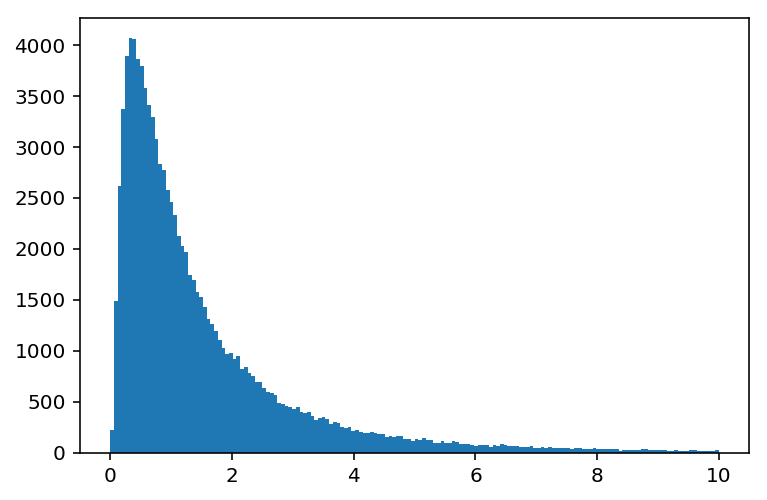

In [2]:
vals = np.random.lognormal(mean=0, sigma=1, size=100000)
plt.hist(vals, bins='auto', range=(0,10))
plt.show()

We can also use the one in SciPy, which gives lots of other useful tools. You can use it with a function interface, or an OO interface:

In [ ]:
vals = scipy.stats.lognorm.rvs(s=1, size=100000)
plt.hist(vals, bins='auto', range=(0,10))
plt.show()

You can use `loc` and `scale` to adjust the mean that was available in Numpy.

You can also "freeze" the distribution into an object (this is the OO interface).

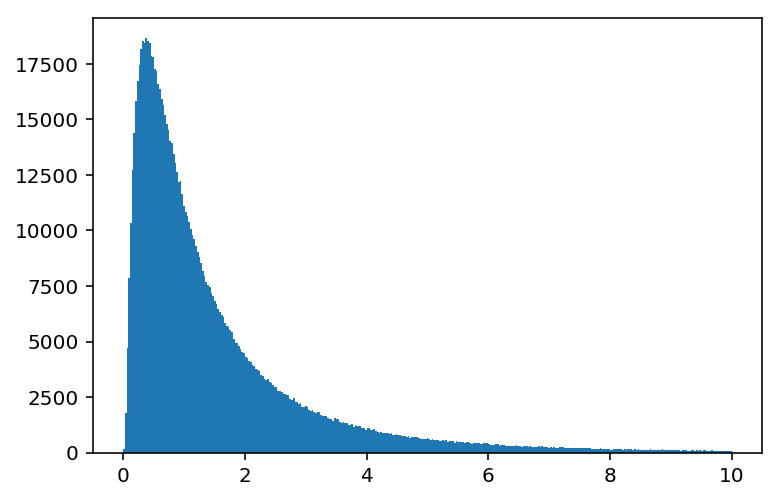

In [4]:
ob = scipy.stats.lognorm(s=1)
vals = ob.rvs(size=1000000)
plt.hist(vals, bins='auto', range=(0,10))
plt.show()

Lots of other methods are available in both interfaces, let's look at one or two:

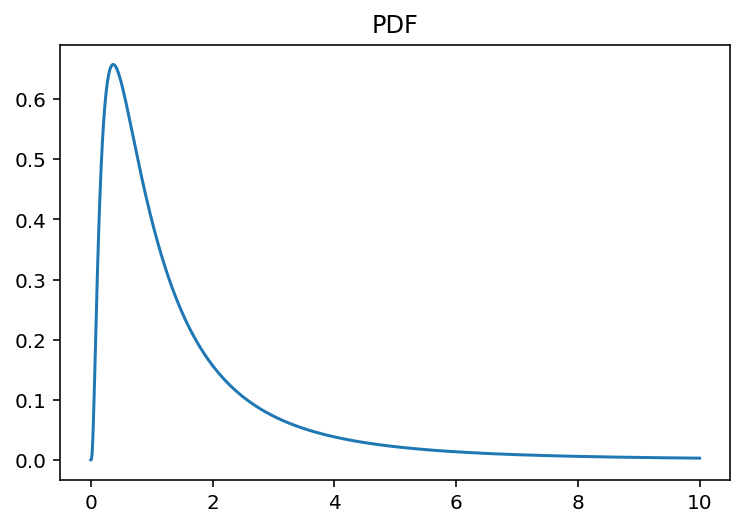

In [5]:
x = np.linspace(0,10, 1000)
y = ob.pdf(x)
plt.plot(x,y)
plt.title("PDF")
plt.show()

In [ ]:
x = np.linspace(0,10, 1000)
y = ob.cdf(x)
plt.plot(x,y)
plt.title("CDF")
plt.show()

### Problems with SciPy stats:
* Fitting is **very** limited - you can't combine distributions
* Not easy to build new distributions
* Not all distributions support all methods

Other toolkits exist - we'll see more in the fitting lectures.

## Case 2: Converting an existing distribution

Let's say we didn't know about lognormal. But we do know how to convert an existing distribution to a lognormal, though! The logarithm of a lognormal is normally distributed, so:

In [ ]:
gauss = np.random.normal(size=100_000)
vals = np.exp(gauss)
plt.hist(vals, bins='auto', range=(0,10))
plt.show()

## Case 3: Rejection

Now we are getting into situations where we do not have a nice existing distribution to use. We will have to start losing events to generate a distribution. Let's look at the most general way first: rejection sampling. For simplicity, we will use the CDF and PDF we already have from SciPy, but you can make your own.

A key element you need here is the **maximum** value of the PDF. You must select a cut value larger than this maximum value. You can search for the maximum value beforehand - or if you are lucky, you may know it. We will look at the previous plot and say it's 0.7.

<!--
xvals = np.random.random_sample(size=100_000) * 10  # 0 to 10
yvals = np.random.random_sample(size=100_000) * 0.7 # 0 to .7 (max value)
keep = ob.pdf(xvals) > yvals
vals = xvals[keep]
-->

In [ ]:
xvals = np.random.random_sample(size=100_000) * 10  # 0 to 10
yvals = np.random.random_sample(size=100_000) * 0.7 # 0 to .7 (max value)
...

plt.hist(vals, bins='auto', range=(0,10))
plt.show()
print(f'Number of samples kept: {len(vals):,}')

### Case 3.b: Non-uniform rejection

We can also use a non uniform distribution, were we take the ratio of the two PDFs, and the generation PDF is always above the new PDF (technically, that's what we were doing above).

## Case 4: Using the CDF and binning

Let's backtrack a bit and try using the CDF to be a little smarter. If you do not have an analytically invertible CDF, you can make one with bins (your output will only be as accurate as your bins). You need the inverse of the CDF (called the PPF in SciPy).

<!--
xvals = np.random.random_sample(size=100_000) # 0 to 1
vals = ob.ppf(xvals)
-->

In [ ]:
xvals = np.random.random_sample(size=100_000) # 0 to 1
...

plt.hist(vals, bins='auto', range=(0,10))
plt.show()
print(f'Number of samples kept: {len(vals):,}')

Now, assuming we don't have the nice PPF function:

<!--
xvals = np.random.random_sample(size=100_000) # 0 to 1
bin_edges = np.linspace(0,10,101)
pdfs = ob.pdf(bin_edges) * (bin_edges[1] - bin_edges[0])
cdfs = np.cumsum(pdfs)
vals = np.interp(xvals, cdfs, bin_edges)
-->

In [ ]:
xvals = np.random.random_sample(size=100_000) # 0 to 1
...

plt.hist(vals, bins='auto', range=(0,10))
plt.show()

#### Question

* Why is there a spike at the end of the plot?